<div align="left" style="font-weight: bold; font-family: Computer Modern; font-size: 20px; text-align: left; line-height: 1.5;">
    Universidade Federal da Bahia (UFBA)
    <br>
    Departamento de Engenharia Elétrica e da Computação (DEEC)
    <br>
    Disciplina: ENGG64 - Visão Computacional
    <br>
    Docente: André Gustavo Scolari Conceição
    <br>
    Discente: Gabriel Correia
</div>


---

ED4 - PROCESSAMENTO MONADICO

Resultados Obtidos no Programa: 
Imagens Originais: 


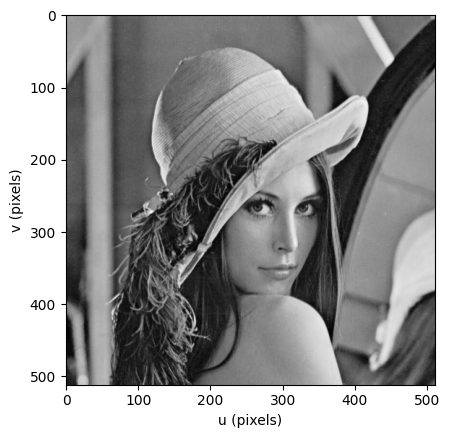

<Figure size 640x480 with 0 Axes>

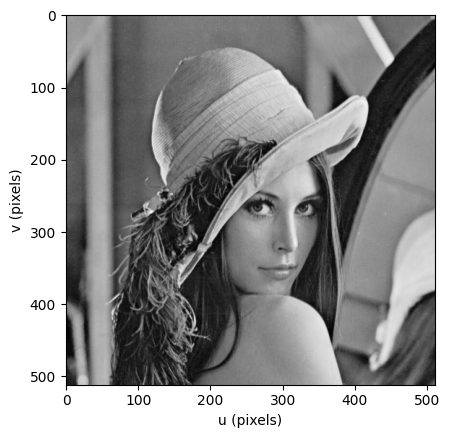

Imagens com Aumento de Brilho: 


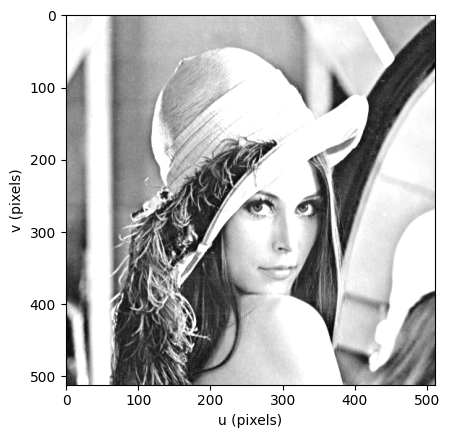

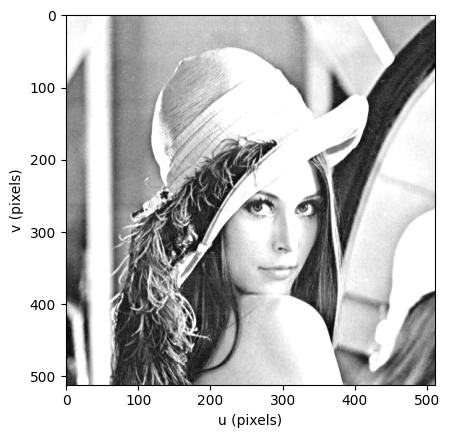

Imagens com Aumento de Contraste Linear: 


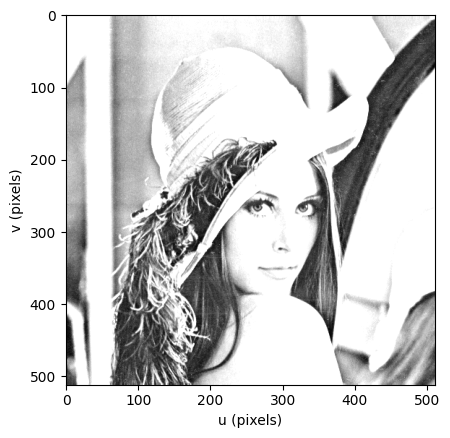

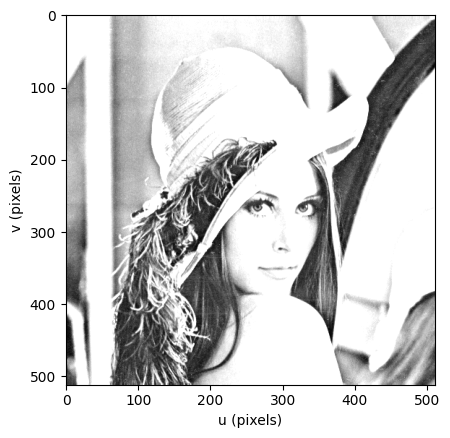

Imagens Negativas: 


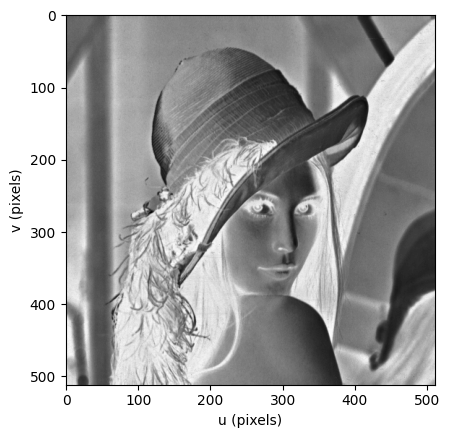

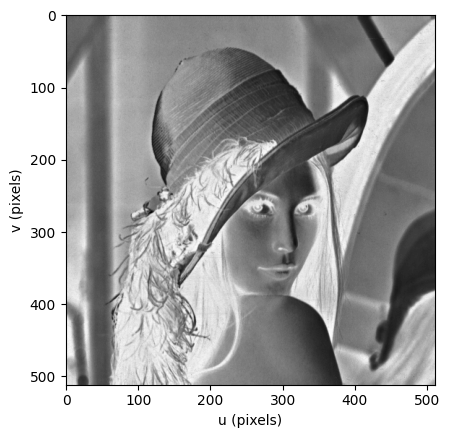

Imagens com Posterisation: 


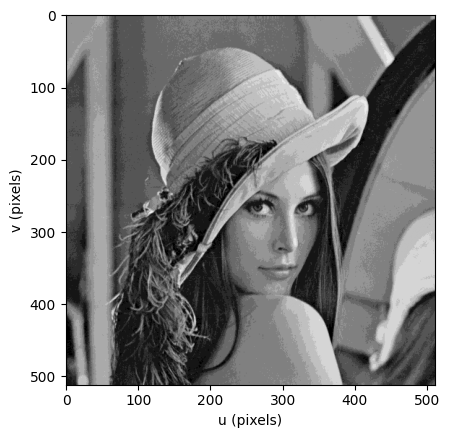

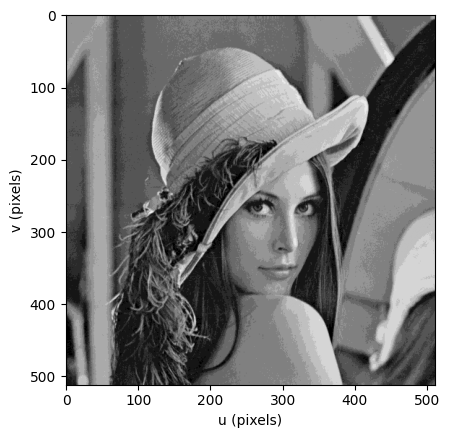

-------------------------------------------------------------------------------------------------------
EXTRA: Imagens com Aumento de Contraste com Transformação Gamma Não-Linear: 


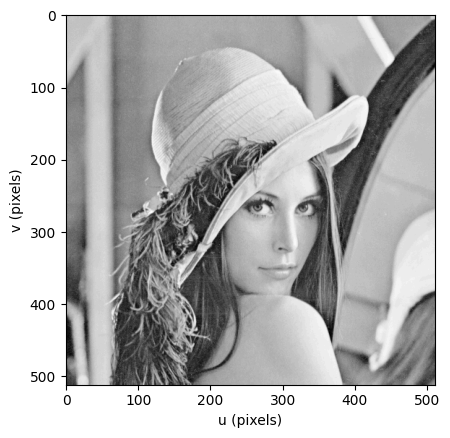

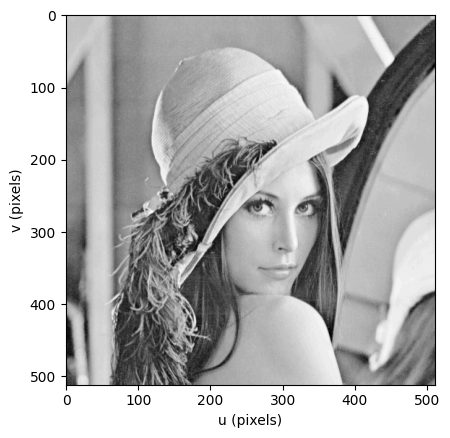

In [1]:
import matplotlib.pyplot as plt
from machinevisiontoolbox import *
from matplotlib.ticker import ScalarFormatter
from spatialmath import SE3
import numpy as np

plt.close('all')
print('Resultados Obtidos no Programa: ')

### Leitura da imagem lena.png
lena_uint8 = Image.Read("lena.png", dtype="uint8")
lena_double = Image.Read("lena.png", dtype="double")

# Mostrando as imagens originais
print('Imagens Originais: ')
lena_uint8.disp()
lena_double.disp()

### Criando uma tabela de LookUp Table para ajustar o BRILHO da imagem
offsetting = 0.4*256 
lut = np.linspace(0, 255, 256, dtype="uint8") + offsetting
lut = np.clip(lut, 0, 255)

# Plotando as Imagens após aplicação do BRIGHTNESS
print('Imagens com Aumento de Brilho: ')
brightened_uint8 = lena_uint8.LUT(lut)
brightened_uint8.disp()
brightened_double = lena_uint8.LUT(lut).to("float")
brightened_double.disp()
#plt.savefig('brightened_uint8.png')
#plt.savefig('brightened_double.png')

### Criando uma tabela de LookUp Table para ajustar o CONTRASTE da imagem
contrast = 2
lut = np.arange(256) * contrast
lut = lut.clip(0, 255)

# Plotando as Imagens após aplicação do CONTRAST (LINEAR)
print('Imagens com Aumento de Contraste Linear: ')
contrast_uint8 = lena_uint8.LUT(lut)
contrast_uint8.disp()
contrast_double = lena_uint8.LUT(lut).to("float")
contrast_double.disp()
#plt.savefig('contrast_uint8.png')
#plt.savefig('contrast_double.png')

### Plotando as Imagens após aplicação do NEGATIVE
print('Imagens Negativas: ')
negative_uint8 = 255-lena_uint8
negative_double = 1 - lena_double
negative_uint8.disp()
negative_double.disp()
#plt.savefig('negative_uint8.png')
#plt.savefig('negative_double.png')

### Plotando as Imagens após aplicação da POSTERISATION
print('Imagens com Posterisation: ')
Niveis = 16 
'''O parâmetro a ser modificado é a quantidade de níveis de cinza desejada'''
Nuint8 = 256/Niveis
Ndouble = 1/Niveis
posterisation_uint8 = Nuint8*(lena_uint8//Nuint8)
posterisation_double = Ndouble*(lena_double//Ndouble)
posterisation_uint8.disp()
posterisation_double.disp()
#plt.savefig('posterisation_uint8.png')
#plt.savefig('posterisation_double.png')

# ---------------------------------------------------------------------------------------------------
### EXTRA: Plotando as Imagens com aumento de Contraste com uma transformação gamma (NÃO-LINEAR)
print('-------------------------------------------------------------------------------------------------------')
print('EXTRA: Imagens com Aumento de Contraste com Transformação Gamma Não-Linear: ')
contrastgamma = 10
lut_contrastgamma = np.linspace(0, 1, 256)**(1/contrastgamma) * 255
lut_contrastgamma = np.clip(lut_contrastgamma, 0, 255).astype("uint8")
contrastgamma_uint8 = lena_uint8.LUT(lut_contrastgamma)
contrastgamma_uint8.disp()
contrastgamma_double = lena_uint8.LUT(lut_contrastgamma).to("float")
contrastgamma_double.disp()
'''a tabela de pesquisa para ajustar o contraste (lut_contrast) é gerada 
usando uma transformação gamma, onde gamma = 1/contrast. Isso pode proporcionar 
um ajuste de contraste mais suave em comparação com uma simples multiplicação linear.'''

plt.show()
